# MEDICAL INSURANCE COST PREDICTION

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and Analysis

In [2]:
#Loading the dataset
dataset=pd.read_csv("C:\\Users\\Arindam\\Documents\\Downloads\\archive (2)\\insurance.csv")


In [3]:
#first 5 rows of the dataset
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

Sex

Smoker

Region


In [6]:
#checking for null values if any
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#statistical measures of the data
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# DATA VISUALIZATION

C:\Users\Arindam\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


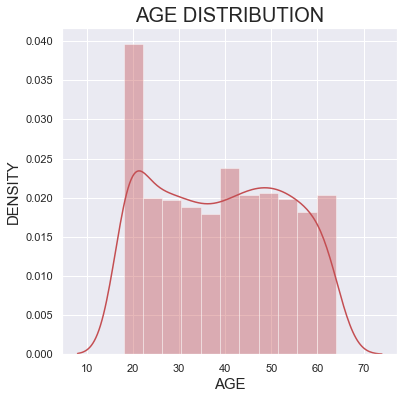

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'],color='r')
plt.title('AGE DISTRIBUTION',fontdict={'fontsize': 20})
plt.xlabel('AGE',fontdict={'fontsize': 15})
plt.ylabel('DENSITY',fontdict={'fontsize': 15})
plt.show()

C:\Users\Arindam\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


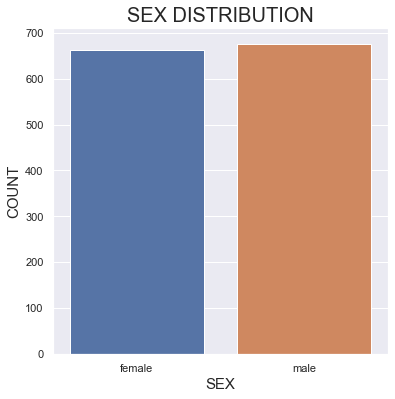

In [9]:
#distribution of gender
plt.figure(figsize=(6,6))
sns.countplot(dataset['sex'] ,saturation=0.80)
plt.title('SEX DISTRIBUTION',fontdict={'fontsize': 20})
plt.xlabel('SEX',fontdict={'fontsize': 15})
plt.ylabel('COUNT',fontdict={'fontsize': 15})
plt.show()

In [10]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

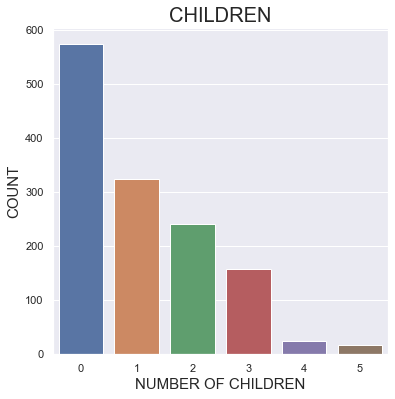

In [11]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=dataset)
plt.title('CHILDREN',fontdict={'fontsize': 20})
plt.xlabel('NUMBER OF CHILDREN',fontdict={'fontsize': 15})
plt.ylabel('COUNT',fontdict={'fontsize': 15})

plt.show()

In [12]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

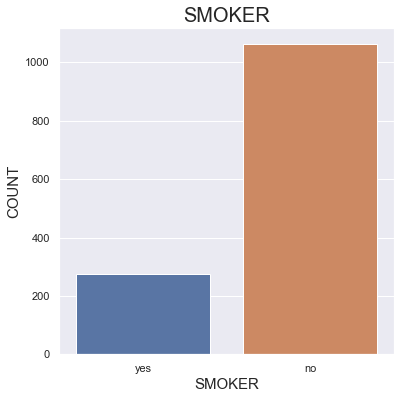

In [13]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=dataset)
plt.title('SMOKER',fontdict={'fontsize': 20})
plt.xlabel('SMOKER',fontdict={'fontsize': 15})
plt.ylabel('COUNT',fontdict={'fontsize': 15})

plt.show()

In [14]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

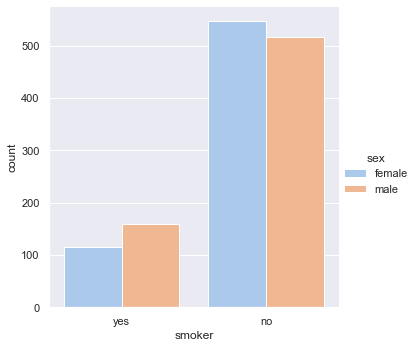

In [15]:
#distribution of male and female in relation with smoking habit
sns.catplot(x="smoker", kind="count", hue = 'sex', data = dataset , palette='pastel');
plt.show()

Luckily, the majority understands the downsides of smoking.

The data seems pretty balanced with a slight skew towards male

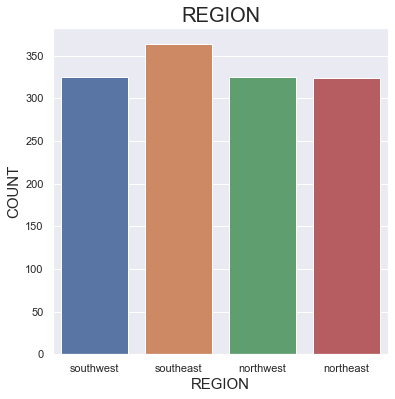

In [16]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=dataset)
plt.title('REGION',fontdict={'fontsize': 20})
plt.xlabel('REGION',fontdict={'fontsize': 15})
plt.ylabel('COUNT',fontdict={'fontsize': 15})

plt.show()

In [17]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Arindam\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


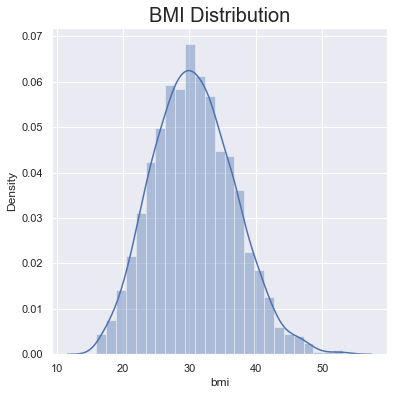

In [18]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution',fontdict={'fontsize': 20})
plt.show()

Normal BMI Range --> 

18.5 to 24.9

C:\Users\Arindam\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


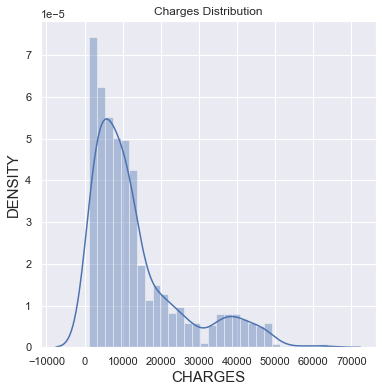

In [19]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title('CHARGES DISTRIBUTION',fontdict={'fontsize': 20})
plt.xlabel('CHARGES',fontdict={'fontsize': 15})
plt.ylabel('DENSITY',fontdict={'fontsize': 15})
plt.title('Charges Distribution')
plt.show()

lmplot () is more computationally intensive 
and is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

C:\Users\Arindam\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


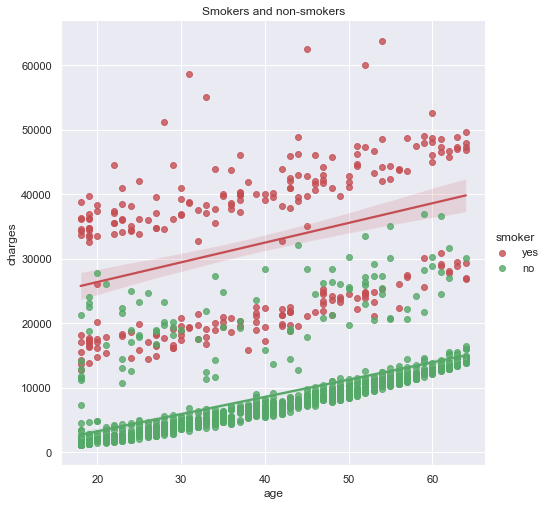

In [20]:
#a relationship plot between age, smoker and charges for medical insurance
sns.lmplot(x="age", y="charges", hue="smoker", data=dataset, palette=dict(yes="r", no="g"), size = 7);
plt.title('Smokers and non-smokers')
plt.show()

While it seems obvious that the charges increase linearly with age, smoking appears to be the highest contributor to charges.

In [21]:
from sklearn.preprocessing import LabelEncoder

# convert str values to int using the scikit-learn encoder

st = dataset.apply(LabelEncoder().fit_transform)

st.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


Using the converted dataset, we can visualize the correlation heatmap


Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables.

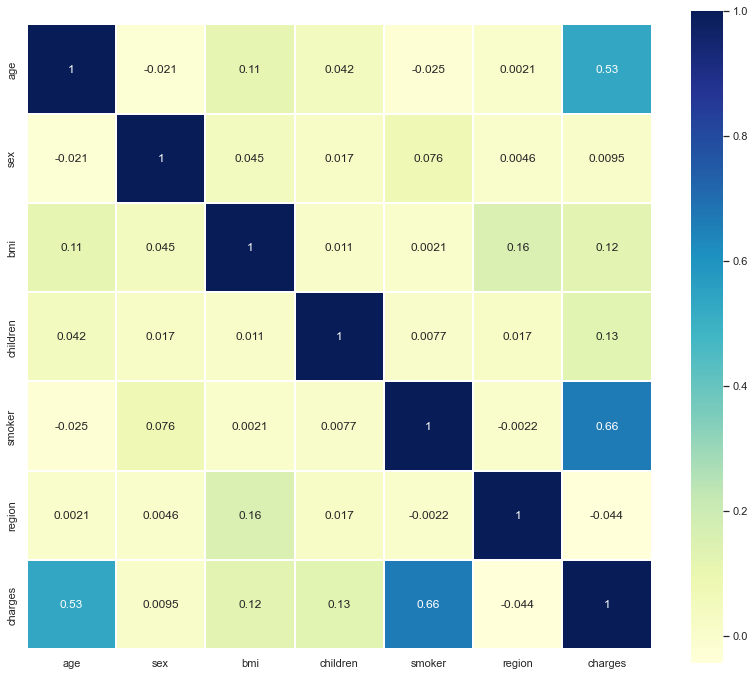

In [22]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show()

# DATA PREPROCESSING

In [23]:
dataset['age'] = dataset['age'].astype(float)
dataset['children'] = dataset['children'].astype(float)

dataset = pd.get_dummies(dataset)

dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0


In [24]:
y = dataset['charges']
X = dataset.drop(columns=['charges'])

SPLITTING DATASET INTO TEST AND TRAIN DATA

In [25]:

# use 20% of dataset as testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(1070, 11) (268, 11) (1070,) (268,)


# MODEL TRAINING

LINEAR REGRESSION

In [27]:
# loading the Linear Regression model
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
# prediction on training data
lr_train_pred =lr.predict(X_train)
#prediction on test data
lr_test_pred =lr.predict(X_test)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(lr_train_mse, lr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

MSE train data: 2.2632e+07, MSE test data: 2.0052e+07
RMSE train data: 4757.3, RMSE test data: 4757.3
R2 train data: 0.84654, R2 test data: 0.85465


sklearn provides cross_val_score method which tries various combinations of train/test splits and produces results of each split test score as output.

"cross_val_score" splits the data into say 5 folds. Then for each fold it fits the data on 4 folds and scores the 5th fold. Then it gives you the 5 scores from which you can calculate a mean and variance for the score.

In [39]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LinearRegression(), X, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2)) 

Accuracy: 0.74 (+/- 0.079)


POLYNOMIAL REGRESSION

In [32]:
#loading polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_poly, y, test_size=0.1, random_state=42)

In [33]:
pr = LinearRegression().fit(X_train, y_train)

pr_train_pred = pr.predict(X_train)
pr_test_pred = pr.predict(X_test)

pr_train_mse = mean_squared_error(y_train,pr_train_pred)
pr_test_mse = mean_squared_error(y_test,pr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(pr_train_mse, pr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(pr_train_mse)), 
    np.sqrt(np.absolute(pr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,pr_train_pred),
    r2_score(y_test,pr_test_pred)))

MSE train data: 2.2632e+07, MSE test data: 2.0052e+07
RMSE train data: 4757.3, RMSE test data: 4757.3
R2 train data: 0.84654, R2 test data: 0.85465


In [34]:
pr_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(), pr_cv.std() * 2)) 

Accuracy: 0.75 (+/- 0.17)


Now we have a better variance score using polynomial relationships.

RANDOM FOREST REGRESSOR MODEL

In [69]:
#using polynomial relationships in random forest regressions
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)

rfr_test_pred = rfr.predict(X_test)

rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))


MSE train data: 3.5009e+06, MSE test data: 2.1879e+07
RMSE train data: 1871.1, RMSE test data: 1871.1
R2 train data: 0.97626, R2 test data: 0.84141


In [36]:
rfr_cv = cross_val_score(RandomForestRegressor(n_estimators = 50), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(rfr_cv.mean(), rfr_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.092)


BAYESIAN RIDGE REGRESSION

In [37]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(X_train, y_train)

br_train_pred = br.predict(X_train)
br_test_pred = br.predict(X_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 2.453e+07, MSE test data: 2.0244e+07
RMSE train data: 4952.8, RMSE test data: 4952.8
R2 train data: 0.83366, R2 test data: 0.85326


In [38]:
br_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(br_cv.mean(), br_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.069)


# CONCLUSION

We can assume that the Random Forest wins with a variance score of 97% against training data, 

and 84% against test data.

It also has the lowest root MSE value.